# Simple Fit Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For creating data
from pyemittance.optics import quad_rmat_mat2, propagate_sigma

# Import pyemittance modules
# Handles I/O of data
from pyemittance.observer import Observer
# Handles optics and emittance/bmag calc
from pyemittance.emittance_calc import EmitCalc

# Create data

In [2]:
# Some beam covariance matrix
EMIT = 1e-9
BETA_X = 10
ALPHA_X = -1
GAMMA_X = (1+ALPHA_X**2)/BETA_X
SIGMA_X = np.sqrt(EMIT*BETA_X)
SIGMA_PX = np.sqrt(EMIT*GAMMA_X)
COV_X__PX = -ALPHA_X*EMIT


SIGMA_11 = SIGMA_X**2
SIGMA_12 = COV_X__PX
SIGMA_22 = SIGMA_PX**2

SIGMA0 = np.array([[SIGMA_11, SIGMA_12], [SIGMA_12, SIGMA_22]])

In [3]:
emit_calc = EmitCalc()

def beam_size_meas(kL, sigma0, Ltot=2.2, Lquad=0):
    mat2 = quad_rmat_mat2(kL, d=Ltot, Lquad=Lquad, rmat=None)
    sigma1 = propagate_sigma(sigma0, mat2)
    return np.sqrt(sigma1[0,0])

def model(kL):
    return beam_size_meas(kL, SIGMA0, Ltot=2.26, Lquad=0.108)

kLlist = np.linspace(0.2, 0.7, 10)

# Make the data
meas =  np.array([model(k) for k in kLlist])

No configuration specified. Taking default LCLS-OTR2 configs.
Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


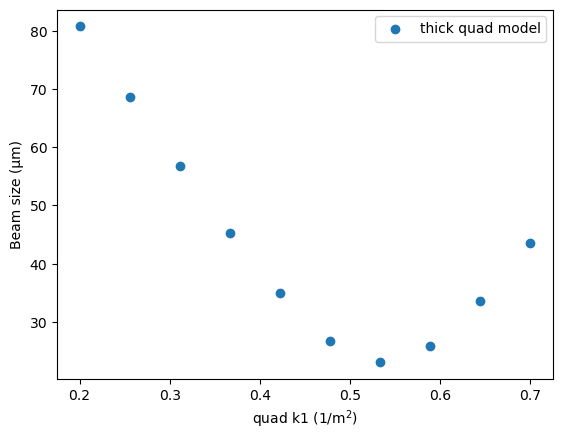

In [4]:
plt.scatter(kLlist, meas*1e6, label='thick quad model')
plt.xlabel(r'quad k1 (1/m$^2$)')
plt.ylabel('Beam size (µm)')
plt.legend()

# Fit data w/ PyEmittance: this can be used with any given dataset
Units needed: 
- kGauss for quadrupole strengths
- meters for beam sizes and beam sizes errors

- returns emittance in m*rad

## Run the cell below, and with the default LCLS-OTR2 values, you should obtain:
nemitx : 1.17 mm.mrad \
nemity : 1.17 mm.mrad \
nemit : 1.17 mm.mrad \
bmagx : 4.06 \
bmagy : 4.06 

No configuration specified. Taking default LCLS-OTR2 configs.
Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


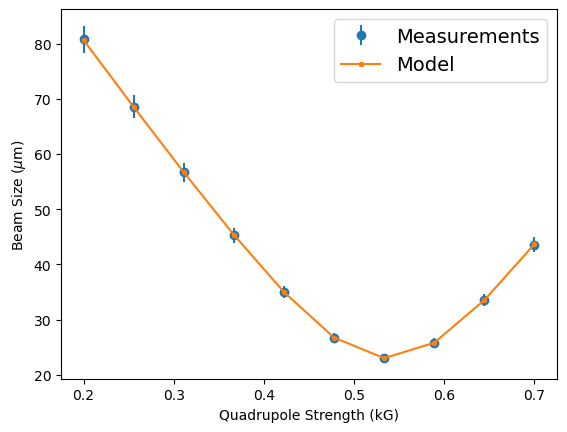

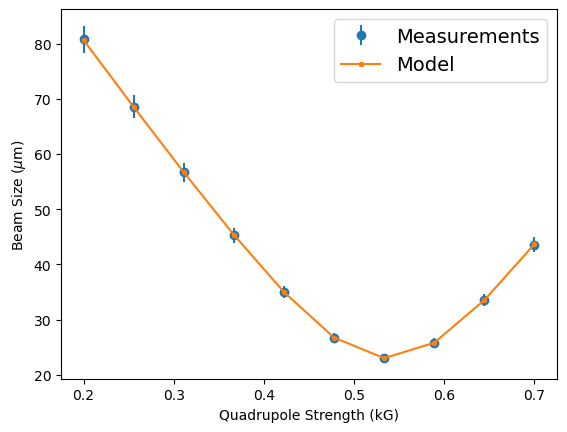

nemitx : 1.17 mm.mrad
nemity : 1.17 mm.mrad
nemit : 1.17 mm.mrad
bmagx : 4.06
bmagy : 4.06


In [5]:
# Observer class handles all I/O
# avoids repeating measurements within an emittance calc
ef = EmitCalc({'x': kLlist,'y': kLlist},
              {'x': meas ,'y': meas},
              {'x': meas*0.03 ,'y': meas*0.03}
             )
ef.plot = True
ef.save_runs = False
ef.calc_bmag = True

ef.get_emit()


print(f'nemitx : {ef.out_dict["nemitx"]/1e-6:.2f} mm.mrad')
print(f'nemity : {ef.out_dict["nemity"]/1e-6:.2f} mm.mrad')
print(f'nemit : {ef.out_dict["nemit"]/1e-6:.2f} mm.mrad')
print(f'bmagx : {ef.out_dict["bmagx"]:.2f}')
print(f'bmagy : {ef.out_dict["bmagy"]:.2f}')